In [10]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [276]:
mse_err = lambda y, y_pred : sum((y - y_pred) ** 2) / len(y)

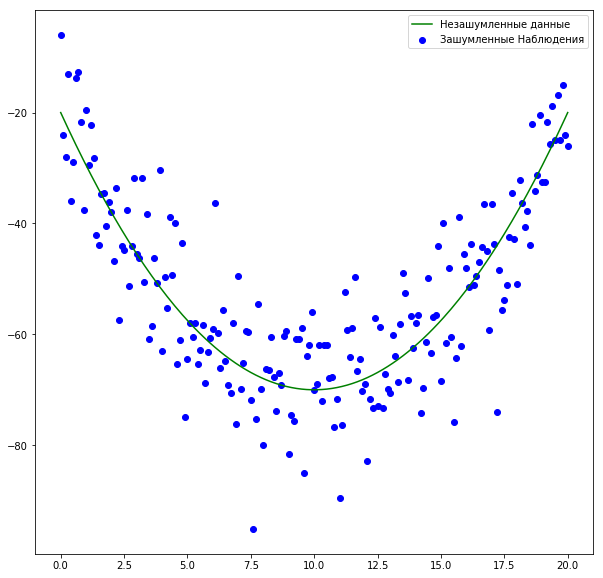

In [446]:
x_size = 200
x0 = np.ones(x_size+1)
x1 = np.linspace(0, 0.1 * x_size , x_size+1)
x2 = x1**2

X = np.vstack([x0,x1,x2])
W = np.array([-20,-10, 0.5])
y = np.array([int(random.gauss(0, 10)) + i for i in np.dot(W, X)])

plt.figure(figsize=(10,10))
plt.scatter(x1, y, label='Зашумленные Наблюдения', c='b')
plt.plot(x1, X.T @ W, label='Незашумленные данные', c='g')
plt.legend()

In [447]:
mse_err(X.T @ W, y)

77.7860696517413

In [453]:
W_pred = np.ones(W.shape[0])
Alpha, i, n = 0.001, 0, len(y)
mse_previose = mse_err(X.T @ W_pred, y) + 1
mse_last = mse_err(X.T @ W_pred, y)

while mse_previose - mse_last > 1e-10:
    i += 1
    if i % 100000 == 0: mse_previose = mse_last
    Wg = 2 / n * (X.T @ W_pred - y) @ X.T
    Wg = Wg / ((Wg @ Wg)**0.5)
    W_pred -= Alpha * Wg
    if i % 100000 == 0: 
        mse_last = mse_err(X.T @ W_pred, y)
    
print('Кол-во итераций:', i)
print('Результат', W_pred, mse_err(X.T @ W_pred, y), Wg)

Кол-во итераций: 2100000
Результат [-19.62641597  -9.82721929   0.48794398] 77.26573119649623 [-0.00414107 -0.06223955 -0.99805265]


In [454]:
#Метод наименьших квадратов

W_mnk = np.linalg.inv(np.dot(X, X.T)) @ X @ y

W_mnk, mse_err(X.T @ W_mnk, y)



(array([-19.62643181,  -9.82724763,   0.48744484]), 77.25763968826944)

In [459]:
np.linalg.inv(X@X.T) @ X @y

array([-19.62643181,  -9.82724763,   0.48744484])

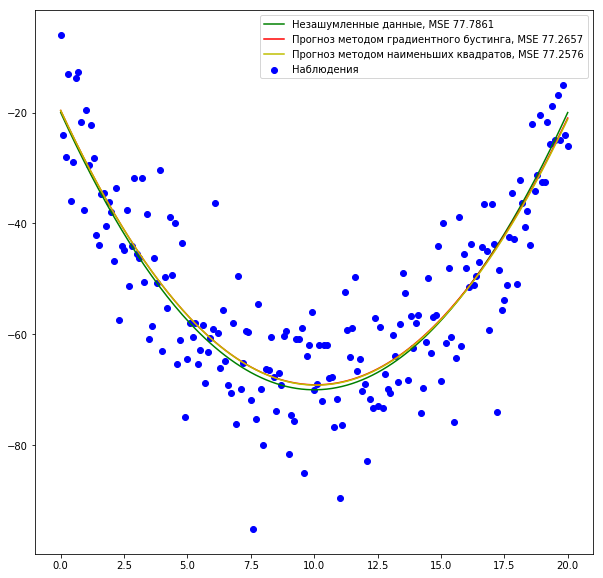

In [455]:
plt.figure(figsize=(10,10))

plt.scatter(x1, y, label='Наблюдения', c='b')
plt.plot(x1, X.T @ W, label='Незашумленные данные, MSE ' + str(round(mse_err(X.T @ W, y),4)), c='g')
plt.plot(x1, X.T @ W_pred, label='Прогноз методом градиентного бустинга, MSE ' + str(round(mse_err(X.T @ W_pred, y),4)), c='r')
plt.plot(x1, X.T @ W_mnk, label='Прогноз методом наименьших квадратов, MSE ' + str(round(mse_err(X.T @ W_mnk, y),4)), c='y')
plt.legend()
plt.show()